In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


# Define the function to load data
def load_data(data_dir):
    images = []
    labels = []

    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (64, 64))
                images.append(image)
                labels.append(label)
                print("Processed image path:", image_path)
    return np.array(images), np.array(labels)

# Load the data
data_dir = r"C:\Users\gouri\Downloads\archive (1)\asl_alphabet_train\asl_alphabet_train"
images, labels = load_data(data_dir)
images = images.astype('float32') / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



# Save preprocessed data
np.savez("preprocessed_data.npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)


In [19]:
import numpy as np
import cv2

# Load preprocessed data
data = np.load("preprocessed_data.npz")
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

# Define function to extract ROI with reduced cropping
def extract_roi(image):
    # Example: Extracting a smaller central region as ROI
    height, width, _ = image.shape
    roi_size = min(height, width) // 1  # Adjust the divisor to control the size of the ROI
    roi_center = (height // 1, width // 1)
    roi_x = roi_center[0] - roi_size // 2
    roi_y = roi_center[0] - roi_size // 2
    roi = image[roi_x:roi_x+roi_size, roi_y:roi_y+roi_size]
    return roi
# Apply ROI extraction to training and testing sets
X_train_roi = np.array([extract_roi(image) for image in X_train])
X_test_roi = np.array([extract_roi(image) for image in X_test])

# Save ROI data
np.savez("roi_data.npz", X_train=X_train_roi, X_test=X_test_roi, y_train=y_train, y_test=y_test)


In [ ]:
import numpy as np
import cv2
import random

# Load preprocessed data
data = np.load("preprocessed_data.npz")
X_test = data["X_test"]
y_test = data["y_test"]

# Generate 5 random indices
random_indices = random.sample(range(len(X_test)), 5)

# Print the images

for i in random_indices:
    image = X_test[i]
    label = y_test[i]
    # Convert image back to uint8
    image = (image * 255).astype(np.uint8)
    # Display the image
    cv2.imshow(f"Image for label {label}", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [4]:
import numpy as np

# Load the .npz file
data = np.load("preprocessed_data.npz")

# Check the keys (names) of arrays stored in the .npz file
print("Keys in the .npz file:", list(data.keys()))

# Access and inspect individual arrays
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# Optionally, you can print the shapes of these arrays to understand their dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Keys in the .npz file: ['X_train', 'X_test', 'y_train', 'y_test']
X_train shape: (62400, 64, 64, 3)
X_test shape: (15600, 64, 64, 3)
y_train shape: (62400,)
y_test shape: (15600,)


In [3]:
import numpy as np

# Load the .npz file
data = np.load("preprocessed_data.npz")

# Access the arrays
y_train = data['y_train']
y_test = data['y_test']

# Print the full list of values
print("y_train values:")
for label in y_train:
    print(label)

print("\ny_test values:")
for label in y_test:
    print(label)


y_train values:
N
L
X
J
G
V
A
V
Q
I
A
R
A
F
X
U
U
A
X
G
E
I
H
N
Y
C
Y
Y
Z
K
B
X
Z
S
N
G
P
H
E
W
M
U
O
M
S
S
U
S
W
Y
W
O
K
P
M
O
Q
L
M
A
V
C
C
N
M
N
L
W
T
L
A
D
T
E
N
U
C
E
D
O
M
J
B
O
I
A
H
E
Z
W
T
B
O
D
O
J
P
B
K
I
U
I
G
S
L
W
I
R
G
M
U
O
M
Z
N
R
U
J
Z
W
V
Q
D
U
L
O
O
A
V
I
V
E
B
M
E
U
E
F
F
V
F
B
I
S
J
H
M
B
E
Y
P
N
F
G
F
A
R
N
Z
R
C
L
W
G
L
L
N
F
O
X
X
B
E
T
R
H
N
V
Y
C
B
F
U
B
L
F
M
A
F
I
H
S
Y
L
N
E
Z
I
L
R
M
E
L
A
F
X
A
K
I
M
P
A
V
L
L
T
F
N
Z
R
C
I
R
D
Y
Z
M
L
X
B
V
Z
X
P
U
J
Z
U
U
U
R
M
V
G
K
W
M
G
W
W
D
K
B
H
G
F
Z
U
X
Q
U
G
V
L
F
P
K
S
T
Y
T
K
O
R
Q
R
L
D
F
K
X
T
A
Q
E
A
D
N
K
M
F
T
N
X
D
L
K
A
H
B
X
H
I
C
O
U
F
W
E
Z
A
L
S
A
Y
R
U
N
E
Y
G
I
L
W
A
M
G
E
Y
I
F
A
T
Y
L
J
V
E
B
K
K
U
O
B
N
E
L
I
M
R
F
A
N
A
T
A
Y
Y
D
F
D
Z
L
B
A
A
V
Z
U
P
E
M
R
V
R
Z
K
B
W
V
I
B
K
V
S
I
R
G
E
Y
T
M
G
C
X
Q
O
I
L
R
W
U
I
U
K
H
A
B
L
U
L
B
V
N
K
W
T
I
O
F
E
G
K
T
V
R
S
L
L
F
S
Y
T
J
C
C
M
K
F
C
A
R
T
J
D
H
T
S
B
X
B
Y
V
D
Y
Y
P
U
M
C
X
Y
M
C
I
B
F
B
A
T
P
D
D
O
J
Q
W
X
F
A
E
W
C
V
B
R
Q
M
U
C
R
V


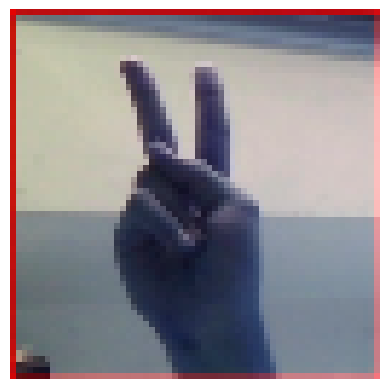

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the preprocessed data
data = np.load("preprocessed_data.npz")

# Assuming the preprocessed images are stored as 'X_train'
X_train = data['X_train']

# Choose one image to display (for example, the first image)
image_to_display = X_train[3564]

# Display the chosen image
plt.imshow(image_to_display)
plt.axis('off')  # Hide axes
plt.show()
